# TP555 - AI/ML

### Lista de Exercícios #2

##### Regressão Linear

9) Neste exercício você irá aplicar o escalonamento mín-max aos atributos de
treinamento de um modelo de regressão linear. Dada a seguinte função observável
y_noisy = x1 + x2 + w
onde x1 é um vetor coluna com M amostras retiradas de uma distribuição Uniforme no
intervalo (-5.0, 5.0), x2 é um vetor coluna com M amostras retiradas de uma distribuição
Uniforme no intervalo (-0.5, 0.5) e w é também um vetor coluna com M amostras
retiradas de uma distribuição Gaussiana Normal com média 0 e variância unitária. Gere
um conjunto de treinamento com M = 1000 exemplos. Utilize o algoritmo do gradiente
descendente em batelada com a seguinte função hipótese
h(x1,x2) = a1*x1 + a2*x2,
com a1 e a2 iniciais iguais a -10 e -10, respectivamente.
a. Sem aplicar escalonamento de features aos exemplo

a) Sem aplicar escalonamento de features aos exemplos de treinamento, plote a
superfície de erro, a superfície de contorno com os parâmetros a1 e a2
encontrados durante as iterações (ou seja, o histórico de valores que o algoritmo
encontra durante o treinamento do modelo) para o conjunto de treinamento e o
gráfico de erro quadrático médio versus o número de iterações. OBS.1: Não se
esqueça de encontrar, manualmente, o valor ótimo para o passo de
aprendizagem. Este deve ser o maior valor possível que não faça o algoritmo
oscilar entre os vales. OBS.2: Não se esqueça também, de calcular o valor ótimo
dos pesos, através da equação normal, e plotá-los no gráfico de contorno
juntamente com o histórico dos pesos.

In [2]:
# Importa todas as bibliotecas necessárias:

import matplotlib.pyplot as plt
import matplotlib 
import numpy as np
import random

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [3]:
# Define o número de dados de entrada

M = 100

In [4]:
# Funções geradoras de entrada (Features):
x1 = np.linspace(-5.0, 5, M)
x2 = np.linspace(0, 5, M)

# Função responsável pelo ruído:
w = np.random.randn(M, 1)

# Função responsável pela saída:
y = x1 + x2 + w

In [5]:
# Concatena as duas entradas
X = np.c_[x1, x2]

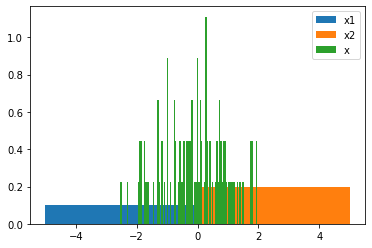

In [6]:
# Plota o histográfico da entrada
plt.hist(x1, bins=100, density=True, label='x1')
plt.hist(x2, bins=100, density=True, label='x2')
plt.hist(w,  bins=100, density=True, label='x')

plt.legend()
plt.show()

In [7]:
# Define a quantidade de iterações:
N = 100

In [8]:
# Aplicação do gradiente descendente:
def batchGradientDescent(X, y, alpha=0.4, n_iterations=1000):
    
    # Define valores aleatórios aos pesos
    a = np.array([-10.0, -10.0]).reshape(2, 1)

    # Cria um vetor histórico responsável por armazenar os pesos
    a_hist = np.zeros((2, n_iterations+1))
    # Inicializa o vetor histórico
    a_hist[:, 0] = a.reshape(2,)

    # Cria uma matriz responsável por armazenar o histórico dos erros
    Jgd = np.zeros(n_iterations+1)
    
    # Aplica a equação do erro quadrático médio:
    Jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

    # LOOP do gradiente descendente batelada
    
    # Começando as iterações em zero
    iteration = 0
    # Iniciando o erro em um
    error = 1
    # Cria um histório para as iterações do gradiente
    grad_hist = np.zeros((2, n_iterations))
    # LOOP
    while iteration < n_iterations and error > 0.001:
        gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
        grad_hist[:, iteration] = gradients.reshape(2,)
        a = a - alpha*gradients
        a_hist[:, iteration+1] = a.reshape(2,)
        Jgd[iteration+1] = (1.0/M)*sum(np.power((y - X.dot(a)), 2))
        error = np.abs(Jgd[iteration+1] - Jgd[iteration])
        iteration = iteration + 1
    return a, Jgd, a_hist, grad_hist, iteration

In [9]:
from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()

scaled_X = stdScaler.fit_transform(X)

scaled_x1 = scaled_X[:,0].reshape(M,1)
scaled_x2 = scaled_X[:,1].reshape(M,1)

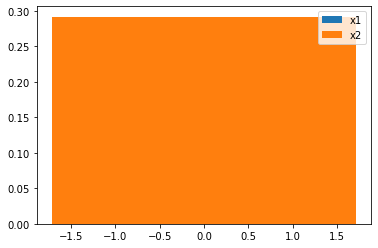

In [10]:
# Plota os valores no gráfico depois de normalizados
plt.hist(scaled_x1, bins=100, density=True, label='x1')
plt.hist(scaled_x2, bins=100, density=True, label='x2')
plt.legend()
plt.show()

In [11]:
# Encontra o peso ótimo
a_opt_pad = np.linalg.pinv(np.transpose(scaled_X).dot(scaled_X)).dot(np.transpose(scaled_X).dot(y))

In [12]:
# Define a quantidade de iterações do algoritmo
N = 5

# Cria um vetor para armazenar os valores dos pesos 
a1 = np.linspace(-20.0, 22.0, N)
a2 = np.linspace(-10.0, 32.0, N)

# Cria uma malha para a superfície de erro
A1, A2 = np.meshgrid(a1, a2)

In [13]:
# Cria uma matriz em brando para armazenar os erros
J = np.zeros((N,N))

# Utiliza um loop para percorrer a superfície de erro
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*scaled_x1 + A2[iter1][iter2]*scaled_x2
        J[iter1][iter2] = (1/M)*np.sum(np.square(y - yhat))

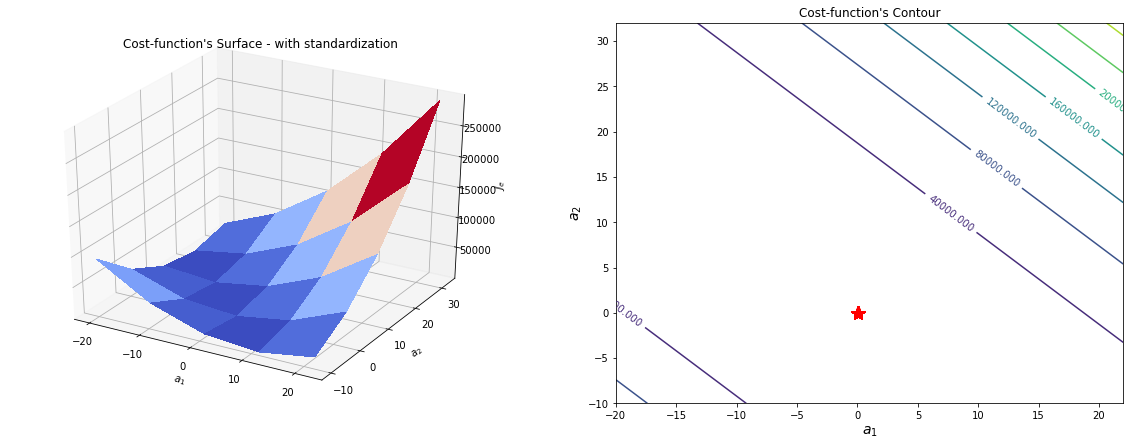

In [14]:
# Plota a superfície da função de erro.
fig = plt.figure(figsize=(20, 7))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Configuração da exibição
ax.set_xlabel('$a_1$')        # Nome para o eixo X
ax.set_ylabel('$a_2$')        # Nome para o eixo Y
ax.set_zlabel('$J_e$')        # Nome para o eixo Z
plt.title('Cost-function\'s Surface - with standardization')    # Nome para o gráfico todo

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)

# Configuração da exibição
plt.clabel(cp, inline=1, fontsize=10)
plt.plot(a_opt_pad[0], a_opt_pad[1], c='r', marker='*', markersize=14)
plt.xlabel('$a_1$', fontsize=14)
plt.ylabel('$a_2$', fontsize=14)
plt.title('Cost-function\'s Contour')

plt.show()